In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [38]:
df = pd.read_csv('output data/spreadspoke_scores_trimmed.csv')
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral
0,09/03/2000,2000,1,False,Atlanta Falcons,36,28,San Francisco 49ers,ATL,-6.5,46.5,Georgia Dome,False
1,09/03/2000,2000,1,False,Buffalo Bills,16,13,Tennessee Titans,BUF,-1.0,40.0,Ralph Wilson Stadium,False
2,09/03/2000,2000,1,False,Cleveland Browns,7,27,Jacksonville Jaguars,JAX,-10.5,38.5,FirstEnergy Stadium,False
3,09/03/2000,2000,1,False,Dallas Cowboys,14,41,Philadelphia Eagles,DAL,-6.0,39.5,Texas Stadium,False
4,09/03/2000,2000,1,False,Green Bay Packers,16,20,New York Jets,GB,-2.5,44.0,Lambeau Field,False


In [39]:
df.describe()

,schedule_season,score_home,score_away,spread_favorite,over_under_line
count,5324.000000,5324.000000,5324.000000,5324.000000,5324.000000
mean,2009.527047,23.159842,20.710368,-5.397164,43.259673
std,5.754236,10.382276,10.088146,3.423281,4.946316
min,2000.000000,0.000000,0.000000,-26.500000,30.000000
25%,2005.000000,16.000000,13.000000,-7.000000,40.000000
50%,2010.000000,23.000000,20.000000,-4.500000,43.500000
75%,2015.000000,30.000000,27.000000,-3.000000,46.500000
max,2019.000000,62.000000,59.000000,0.000000,63.500000


In [40]:
dfvis1 = df[['schedule_season','score_home','score_away']]
dfvis1.head()

,schedule_season,score_home,score_away
0,2000,36,28
1,2000,16,13
2,2000,7,27
3,2000,14,41
4,2000,16,20


In [41]:
dfvis1.groupby('schedule_season').mean()

,score_home,score_away
schedule_season,,
2000,22.169884,18.922780
2001,21.343629,19.196911
2002,23.018727,20.640449
2003,22.689139,19.101124
2004,22.895131,20.250936
2005,22.378277,18.722846
2006,21.303371,20.209738
2007,23.157303,20.228464
2008,23.183521,20.842697


In [50]:
dfvis1line = dfvis1.groupby('schedule_season').mean()
dfvis1line.head()

,score_home,score_away
schedule_season,,
2000,22.169884,18.922780
2001,21.343629,19.196911
2002,23.018727,20.640449
2003,22.689139,19.101124
2004,22.895131,20.250936


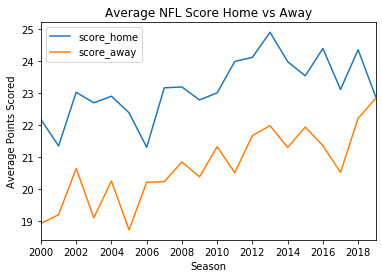

In [54]:
dfvis1line.plot()
plt.title('Average NFL Score Home vs Away')
plt.xlabel('Season')
plt.ylabel('Average Points Scored')
plt.xticks(np.arange(2000, 2020, 2.0))
plt.savefig('Viz_img/Home_vs_Away_Points.png')

In [60]:
dfvis2 = df[['schedule_date','stadium']]
dfvis2

,schedule_date,stadium
0,09/03/2000,Georgia Dome
1,09/03/2000,Ralph Wilson Stadium
2,09/03/2000,FirstEnergy Stadium
3,09/03/2000,Texas Stadium
4,09/03/2000,Lambeau Field
...,...,...
5319,01/12/2020,Lambeau Field
5320,01/12/2020,Arrowhead Stadium
5321,01/19/2020,Arrowhead Stadium
5322,01/19/2020,Levi's Stadium


In [62]:
dfvis2.groupby('stadium').count()

,schedule_date
stadium,
AT&T Stadium,25
Alamo Dome,3
Alltel Stadium,1
Arrowhead Stadium,167
Bank of America Stadium,166
...,...
Twickenham Stadium,3
U.S. Bank Stadium,34
University of Phoenix Stadium,165


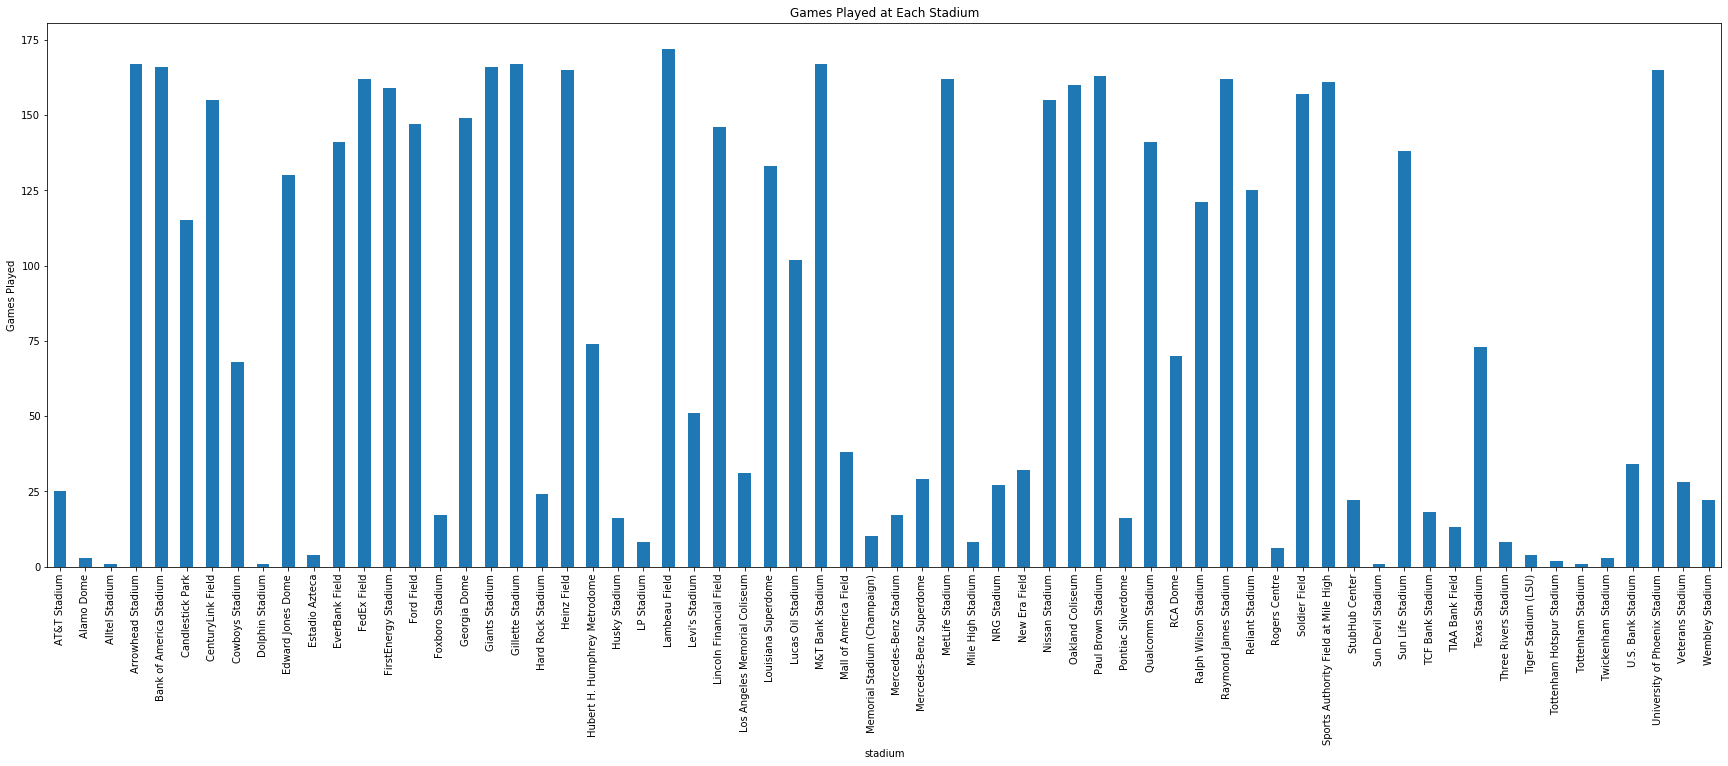

In [82]:
dfvis2bar = dfvis2.groupby('stadium').count()
dfvis2bar.plot(kind='bar', figsize=(30,10), legend=None, title="Games Played at Each Stadium").set_ylabel('Games Played')
plt.savefig('Viz_img/Games_Per_Stadium.png')


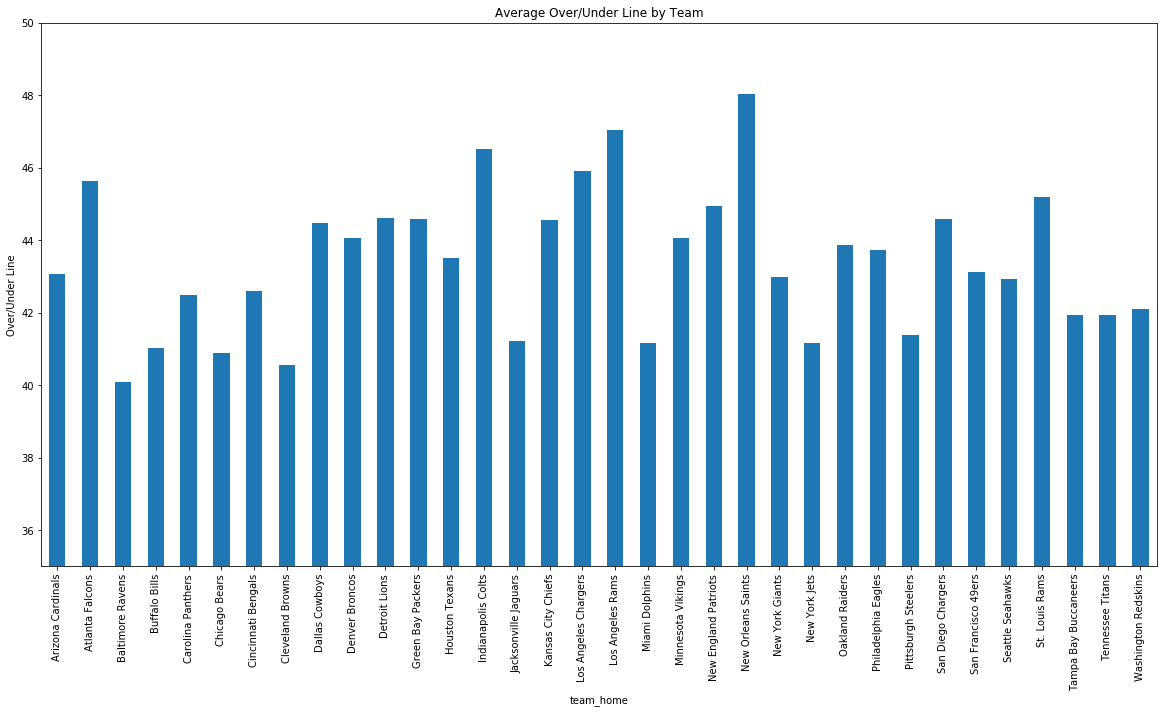

In [102]:
dfvis3 = df.groupby('team_home').mean()
dfvis3 = dfvis3['over_under_line']
dfvis3bar = dfvis3.plot(kind='bar', figsize=(20,10), ylim=(35,50), title='Average Over/Under Line by Team').set_ylabel('Over/Under Line')
plt.savefig('Viz_img/Avg_OU_byTeam.png')